### Data wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xlrd')
from datetime import datetime
from matplotlib.projections import PolarAxes
from windrose import WindroseAxes

In [2]:
data_dir = 'C:\\Users\\CHENGG\\Desktop\\PowerStation_KerrawarryCreekTrail\\Data\\'
aqms_name = ['AlbionParkSouth', 'Bargo', 'Goulburn']
df_name = ['A', 'B', 'G']
start_date = np.arange(2018,2024,1)
end_date = np.arange(2019,2025,1)

In [3]:
dfall = {}
for i, aqms in enumerate(aqms_loc):
    df = pd.DataFrame()
    for the_date in start_date:
        temp_data_source = data_dir + aqms + '_' + str(the_date) + '-' + str(the_date + 1) + '.xls'
        temp_data = pd.read_excel(temp_data_source, sheet_name='worksheet1', header=2)
        df = pd.concat([df, temp_data], axis=0, join='outer')
    df.drop_duplicates(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df['Time'] = df['Time'].replace('24:00', '00:00')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
    df['hour'] = df['Time'].dt.hour
    df['year'] = df.Date.dt.year
    df['month'] = df.Date.dt.month
    dfall[df_name[i]] = df

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but 

In [4]:
dfall['A'].head(1)

,Date,Time,ALBION PARK SOUTH WDR 1h average [°],ALBION PARK SOUTH TEMP 1h average [°C],ALBION PARK SOUTH WSP 1h average [m/s],ALBION PARK SOUTH NO2 1h average [pphm],ALBION PARK SOUTH PM10 1h average [µg/m³],ALBION PARK SOUTH PM2.5 1h average [µg/m³],ALBION PARK SOUTH HUMID 1h average [%],ALBION PARK SOUTH RAIN 1h average [mm/m²],hour,year,month
0,2018-01-01,1900-01-01 01:00:00,309.5,20.4,0.4,0.3,18.6,13.3,89.3,NaN,1,2018,1


In [5]:
dfall['B'].head(1)

,Date,Time,BARGO WDR 1h average [°],BARGO TEMP 1h average [°C],BARGO WSP 1h average [m/s],BARGO NO2 1h average [pphm],BARGO PM10 1h average [µg/m³],BARGO PM2.5 1h average [µg/m³],BARGO HUMID 1h average [%],BARGO RAIN 1h average [mm/m²],hour,year,month
0,2018-01-01,1900-01-01 01:00:00,338.4,19.3,0.3,0.3,24.4,7.7,91.2,NaN,1,2018,1


In [6]:
dfall['G'].head(1)

,Date,Time,GOULBURN WDR 1h average [°],GOULBURN TEMP 1h average [°C],GOULBURN WSP 1h average [m/s],GOULBURN NO2 1h average [pphm],GOULBURN PM10 1h average [µg/m³],GOULBURN PM2.5 1h average [µg/m³],GOULBURN HUMID 1h average [%],GOULBURN RAIN 1h average [mm/m²],hour,year,month
0,2018-01-01,1900-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,1


In [7]:
FontSize = 18
TickSize = 18

### The hourly plot of the wind speed

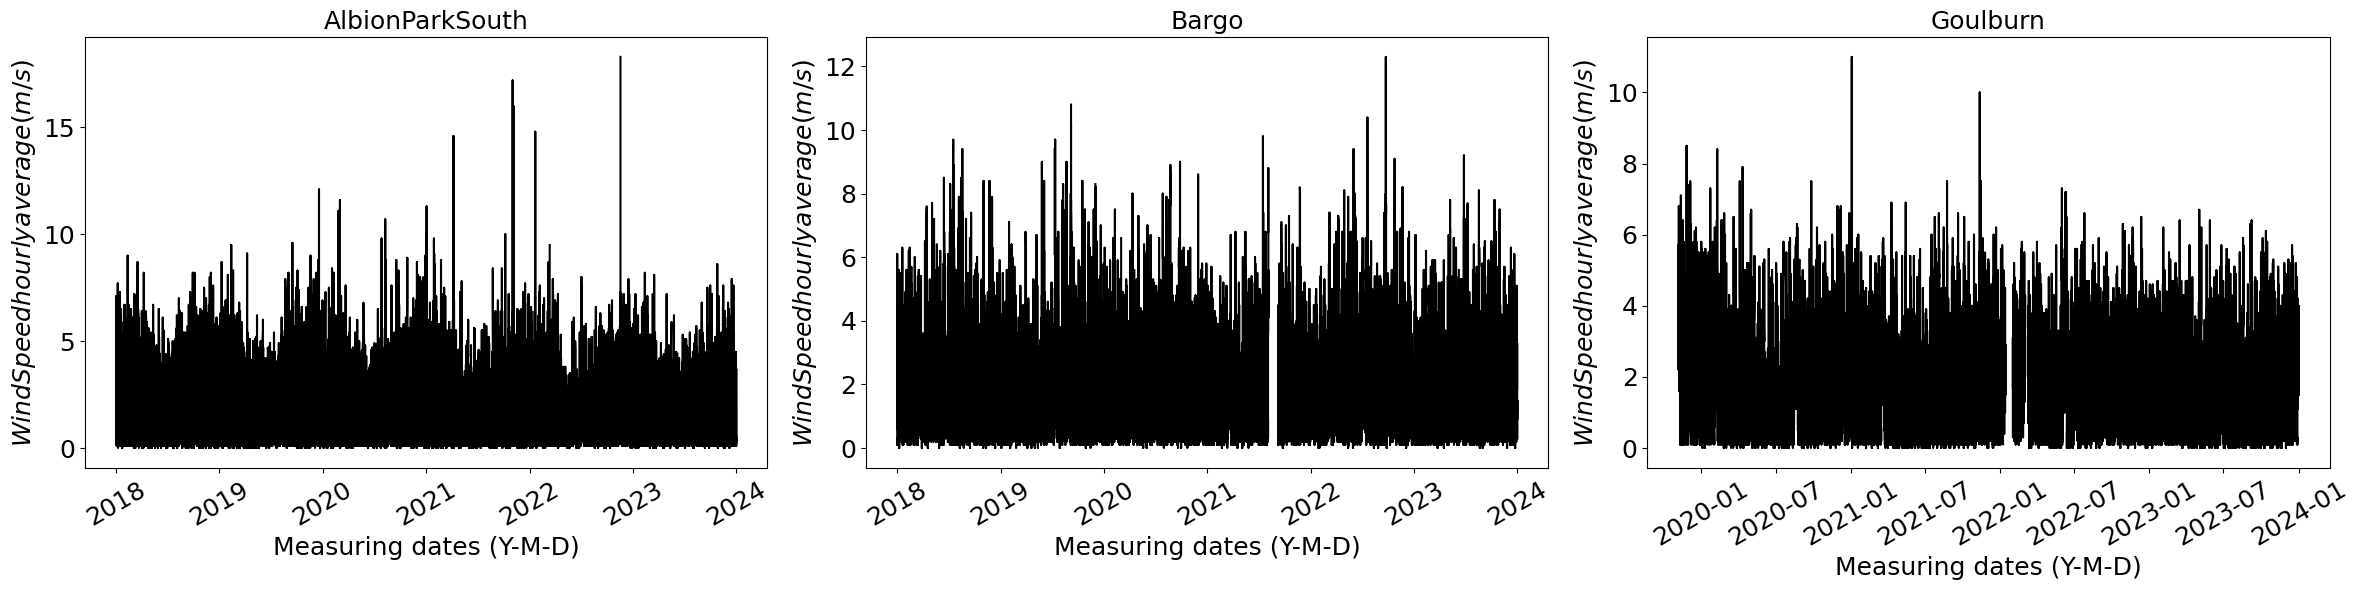

In [8]:
# get the windspeed plot to see the wind speed fluctuations
# ['AlbionParkSouth', 'Bargo', 'Goulburn']
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# AlbionParkSouth
y = dfall['A']['ALBION PARK SOUTH WSP 1h average [m/s]']
x = dfall['A'][['Date']]
ax1.plot(x,y,'k-')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$Wind Speed hourly average \left(m/s\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('AlbionParkSouth', fontsize=TickSize)

# Bargo
y = dfall['B']['BARGO WSP 1h average [m/s]']
x = dfall['B'][['Date']]
ax2.plot(x,y,'k-')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$Wind Speed hourly average \left(m/s\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('Bargo', fontsize=TickSize)

# Goulburn
y = dfall['G']['GOULBURN WSP 1h average [m/s]']
x = dfall['G'][['Date']]
ax3.plot(x,y,'k-')
ax3.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax3.set_ylabel(r'$Wind Speed hourly average \left(m/s\right)$', fontsize=FontSize)
ax3.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax3.tick_params(axis='y', labelsize=TickSize)
ax3.set_title('Goulburn', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

### Validation against the BoM data at TARALGA which is very close to the Project

#### Monthly

Text(0.5, 1.0, 'Goulburn 9AM Jan')

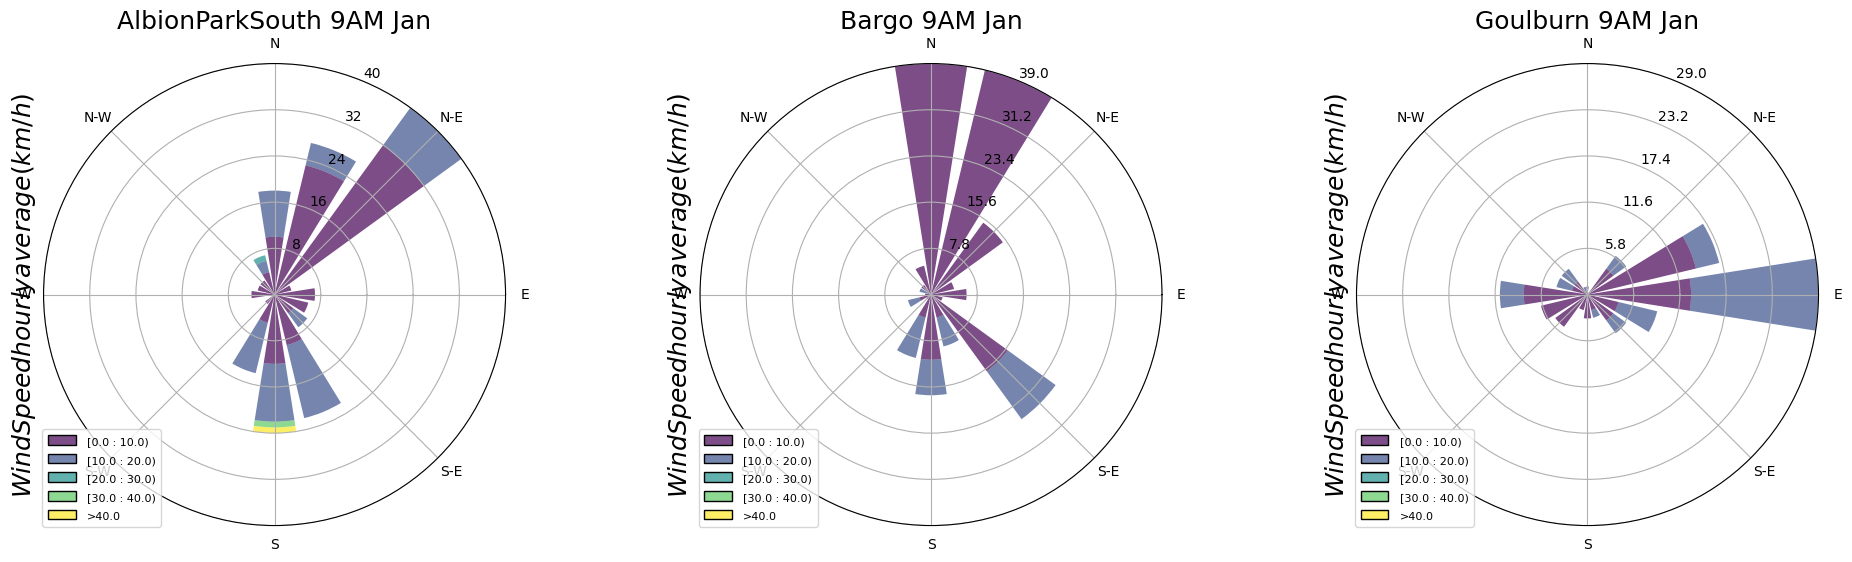

In [21]:
# plot the monthly windrose at 9AM and 3PM, as well as the yearly windrose
month_select = 1
hour_select = 9

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='windrose'), figsize=(24, 6))
tmp_df = dfall['A']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['ALBION PARK SOUTH WDR 1h average [°]']
y = df['ALBION PARK SOUTH WSP 1h average [m/s]']*3.6
ax1.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax1.set_legend()
ax1.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax1.set_title('AlbionParkSouth 9AM Jan', fontsize=TickSize)

tmp_df = dfall['B']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['BARGO WDR 1h average [°]']
y = df['BARGO WSP 1h average [m/s]']*3.6
ax2.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax2.set_legend()
ax2.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax2.set_title('Bargo 9AM Jan', fontsize=TickSize)

tmp_df = dfall['G']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['GOULBURN WDR 1h average [°]']
y = df['GOULBURN WSP 1h average [m/s]']*3.6
ax3.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax3.set_legend()
ax3.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax3.set_title('Goulburn 9AM Jan', fontsize=TickSize)

Text(0.5, 1.0, 'Goulburn 9AM Jul')

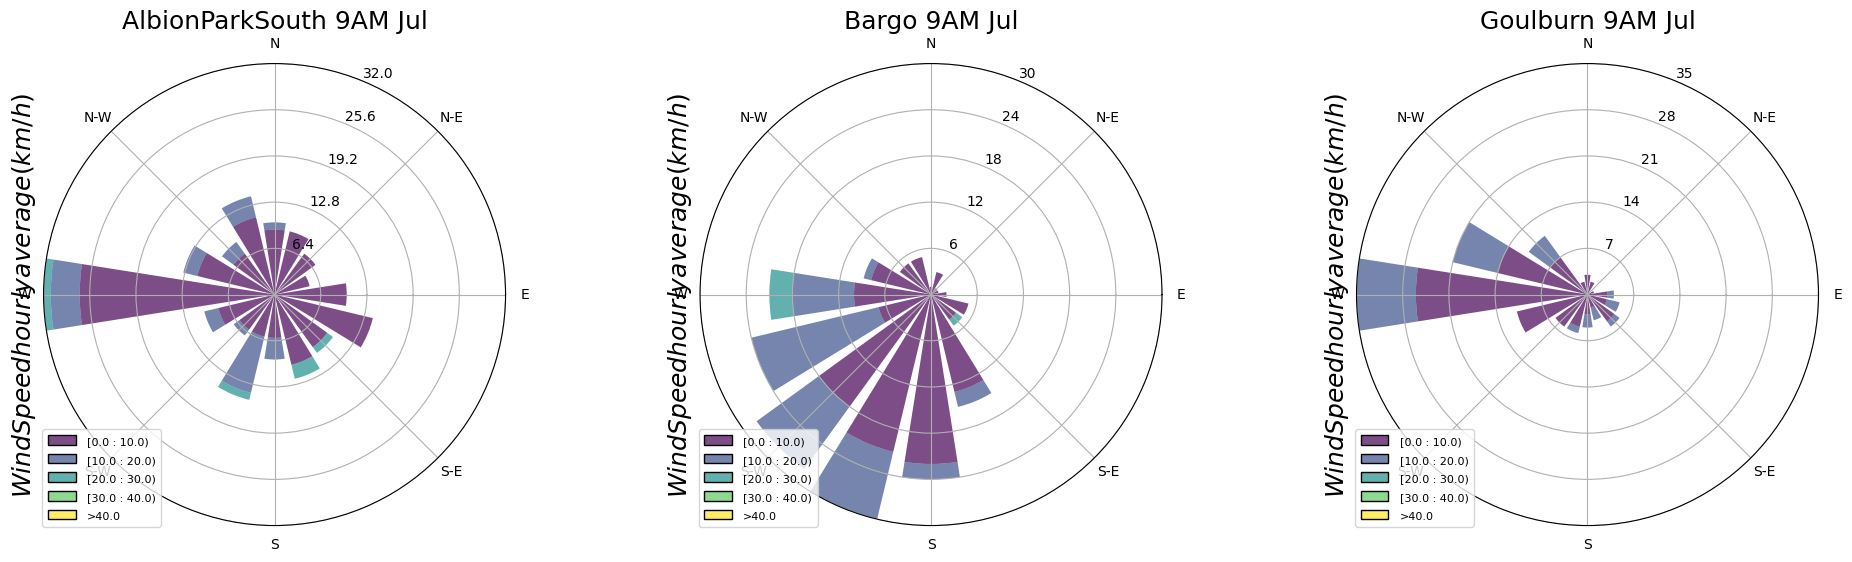

In [17]:
# plot the monthly windrose at 9AM and 3PM, as well as the yearly windrose
month_select = 7
hour_select = 9

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='windrose'), figsize=(24, 6))
tmp_df = dfall['A']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['ALBION PARK SOUTH WDR 1h average [°]']
y = df['ALBION PARK SOUTH WSP 1h average [m/s]']*3.6
ax1.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax1.set_legend()
ax1.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax1.set_title('AlbionParkSouth 9AM Jul', fontsize=TickSize)

tmp_df = dfall['B']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['BARGO WDR 1h average [°]']
y = df['BARGO WSP 1h average [m/s]']*3.6
ax2.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax2.set_legend()
ax2.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax2.set_title('Bargo 9AM Jul', fontsize=TickSize)

tmp_df = dfall['G']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['GOULBURN WDR 1h average [°]']
y = df['GOULBURN WSP 1h average [m/s]']*3.6
ax3.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax3.set_legend()
ax3.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax3.set_title('Goulburn 9AM Jul', fontsize=TickSize)

Text(0.5, 1.0, 'Goulburn 3PM Jan')

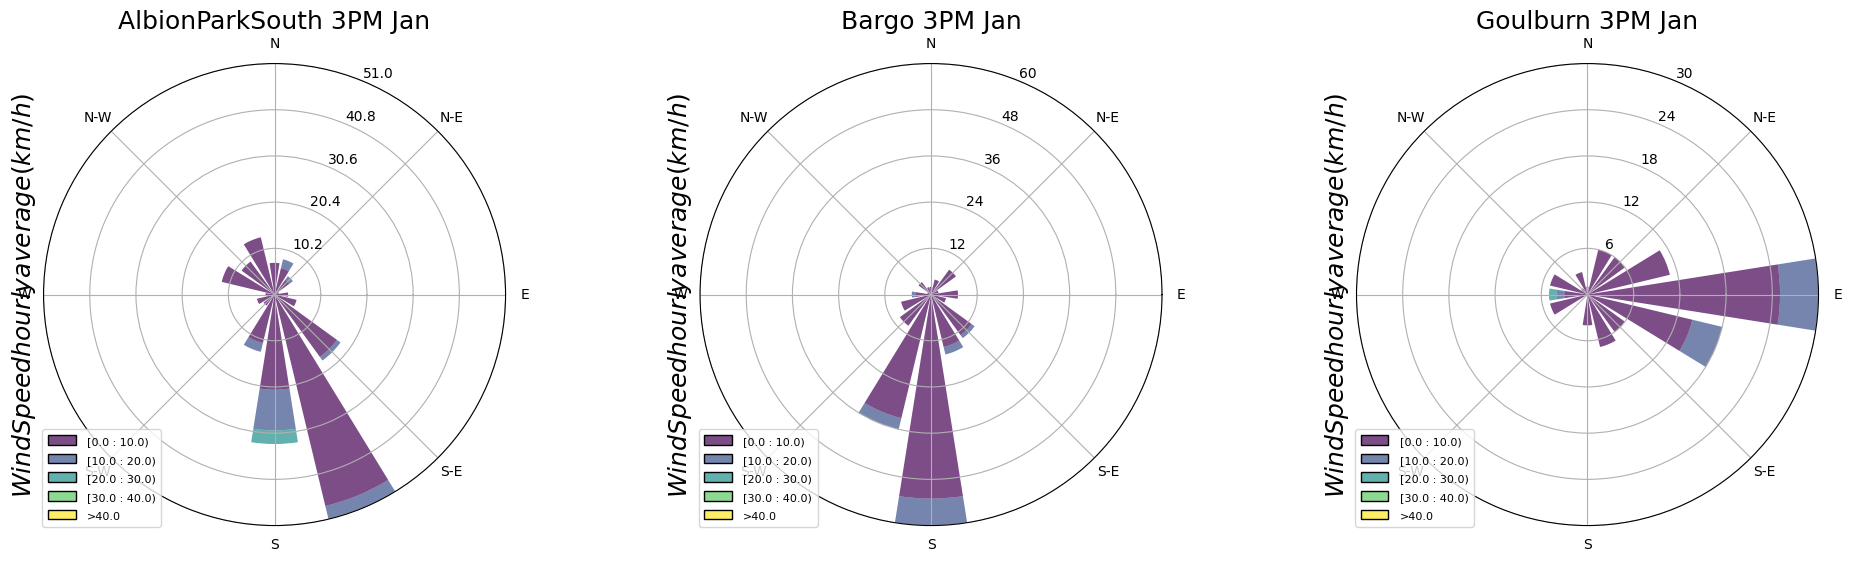

In [18]:
# plot the monthly windrose at 9AM and 3PM, as well as the yearly windrose
month_select = 1
hour_select = 3

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='windrose'), figsize=(24, 6))
tmp_df = dfall['A']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['ALBION PARK SOUTH WDR 1h average [°]']
y = df['ALBION PARK SOUTH WSP 1h average [m/s]']*3.6
ax1.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax1.set_legend()
ax1.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax1.set_title('AlbionParkSouth 3PM Jan', fontsize=TickSize)

tmp_df = dfall['B']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['BARGO WDR 1h average [°]']
y = df['BARGO WSP 1h average [m/s]']*3.6
ax2.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax2.set_legend()
ax2.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax2.set_title('Bargo 3PM Jan', fontsize=TickSize)

tmp_df = dfall['G']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['GOULBURN WDR 1h average [°]']
y = df['GOULBURN WSP 1h average [m/s]']*3.6
ax3.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax3.set_legend()
ax3.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax3.set_title('Goulburn 3PM Jan', fontsize=TickSize)

Text(0.5, 1.0, 'Goulburn 3PM Jul')

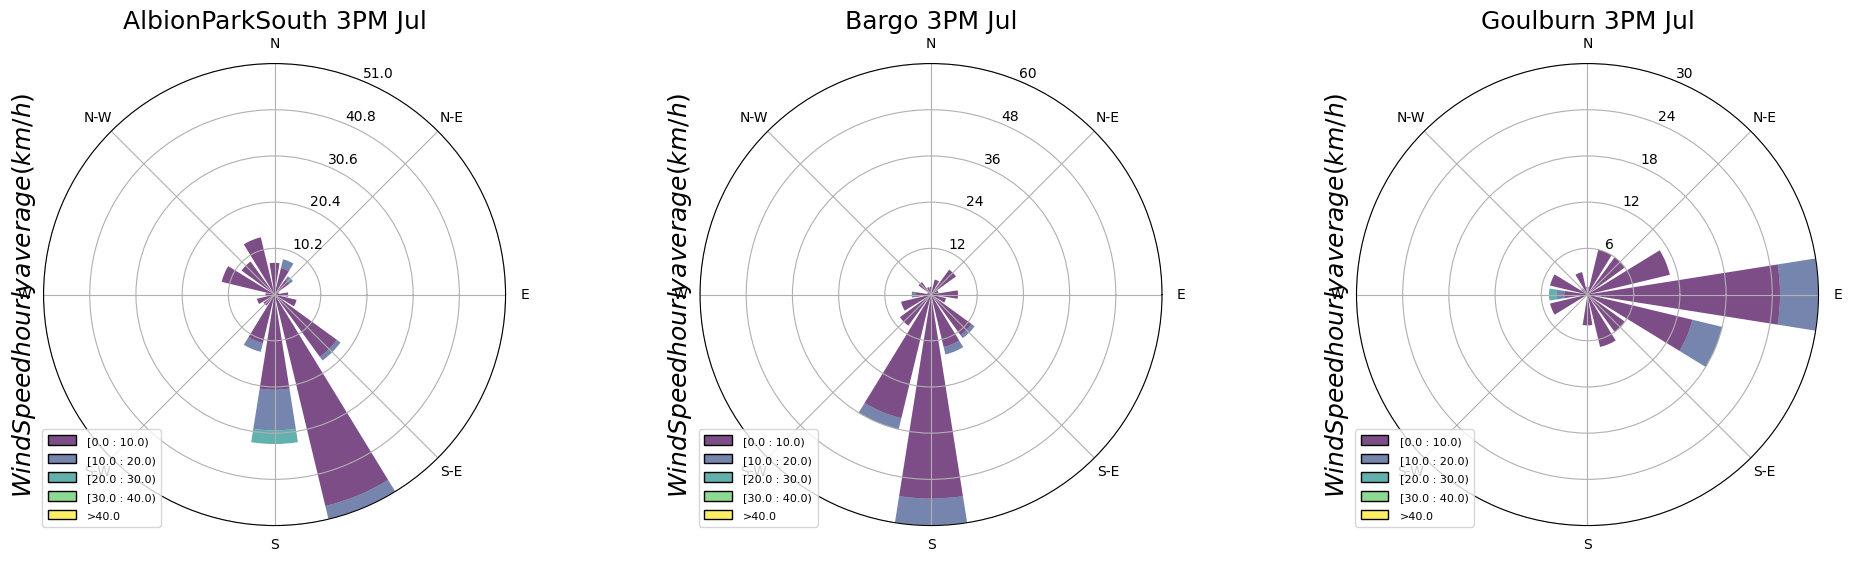

In [19]:
# plot the monthly windrose at 9AM and 3PM, as well as the yearly windrose
month_select = 1
hour_select = 3

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='windrose'), figsize=(24, 6))
tmp_df = dfall['A']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['ALBION PARK SOUTH WDR 1h average [°]']
y = df['ALBION PARK SOUTH WSP 1h average [m/s]']*3.6
ax1.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax1.set_legend()
ax1.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax1.set_title('AlbionParkSouth 3PM Jul', fontsize=TickSize)

tmp_df = dfall['B']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['BARGO WDR 1h average [°]']
y = df['BARGO WSP 1h average [m/s]']*3.6
ax2.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax2.set_legend()
ax2.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax2.set_title('Bargo 3PM Jul', fontsize=TickSize)

tmp_df = dfall['G']
df = tmp_df[(tmp_df.hour == hour_select) & (tmp_df.month == month_select)]
x = df['GOULBURN WDR 1h average [°]']
y = df['GOULBURN WSP 1h average [m/s]']*3.6
ax3.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax3.set_legend()
ax3.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax3.set_title('Goulburn 3PM Jul', fontsize=TickSize)

#### yearly windrose

Text(0.5, 1.0, 'Goulburn 9AM Total')

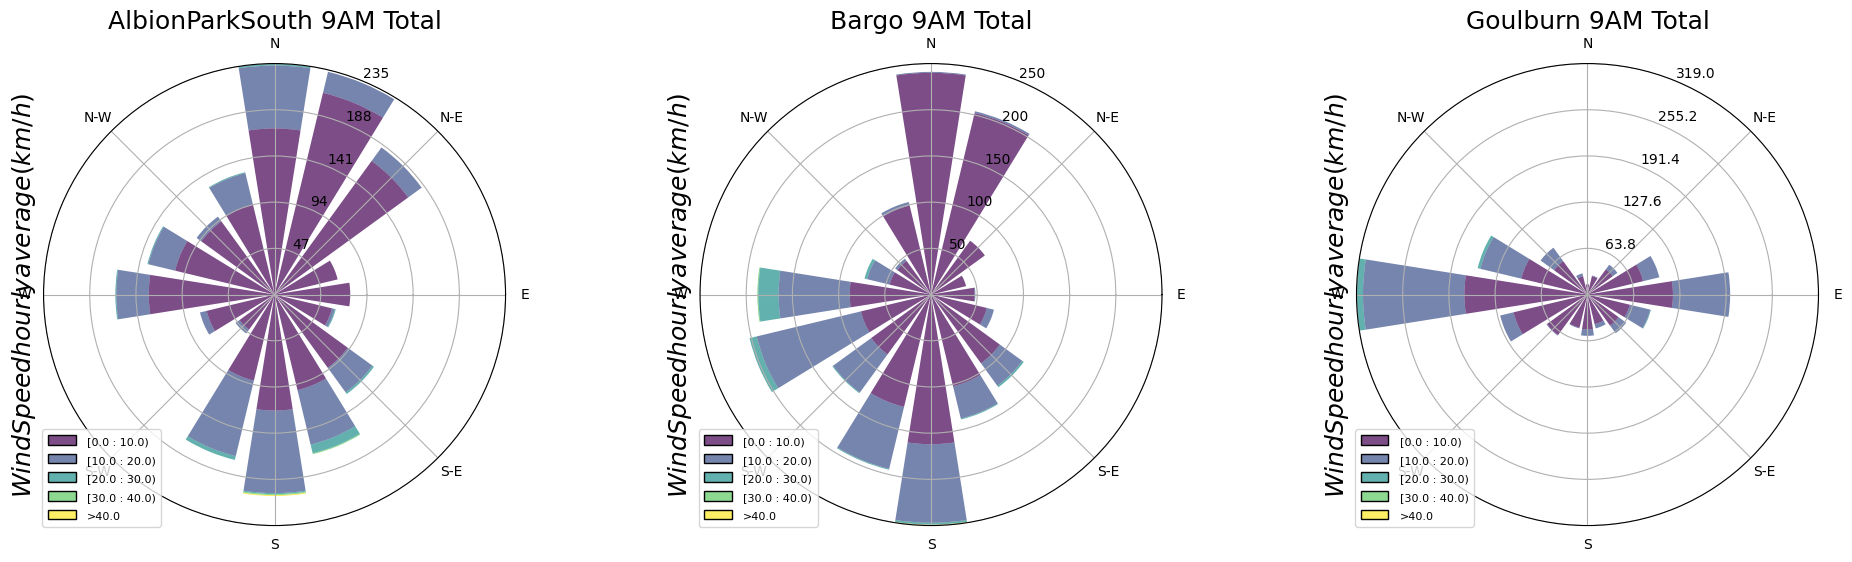

In [26]:
hour_select = 9
# plot the yearly windrose at 9AM and 3PM, as well as the yearly windrose
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='windrose'), figsize=(24, 6))
tmp_df = dfall['A']
df = tmp_df[tmp_df.hour == hour_select]
x = df['ALBION PARK SOUTH WDR 1h average [°]']
y = df['ALBION PARK SOUTH WSP 1h average [m/s]']*3.6
ax1.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax1.set_legend()
ax1.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax1.set_title('AlbionParkSouth 9AM Total', fontsize=TickSize)

tmp_df = dfall['B']
df = tmp_df[tmp_df.hour == hour_select]
x = df['BARGO WDR 1h average [°]']
y = df['BARGO WSP 1h average [m/s]']*3.6
ax2.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax2.set_legend()
ax2.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax2.set_title('Bargo 9AM Total', fontsize=TickSize)

tmp_df = dfall['G']
df = tmp_df[tmp_df.hour == hour_select]
x = df['GOULBURN WDR 1h average [°]']
y = df['GOULBURN WSP 1h average [m/s]']*3.6
ax3.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax3.set_legend()
ax3.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax3.set_title('Goulburn 9AM Total', fontsize=TickSize)

Text(0.5, 1.0, 'Goulburn 3PM Total')

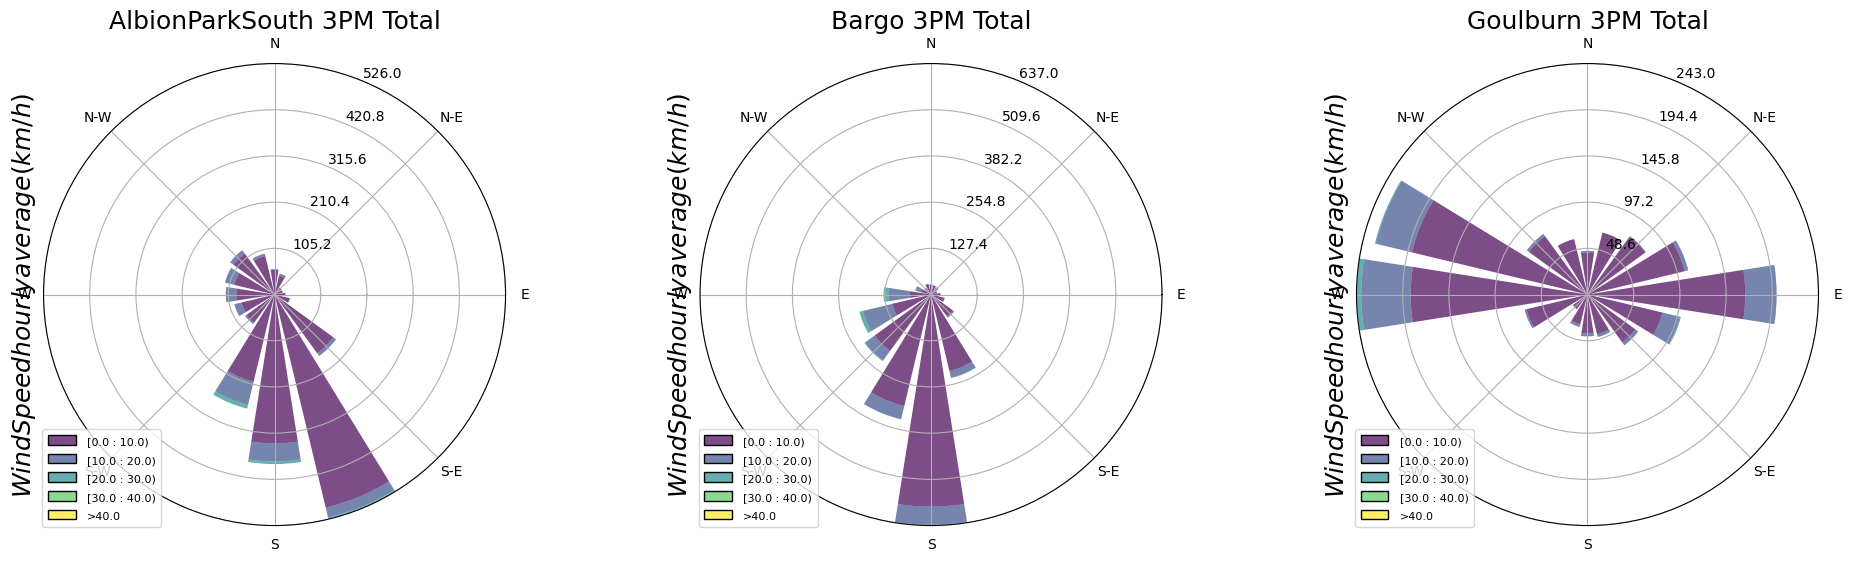

In [25]:
hour_select = 3
# plot the yearly windrose at 9AM and 3PM, as well as the yearly windrose
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw=dict(projection='windrose'), figsize=(24, 6))
tmp_df = dfall['A']
df = tmp_df[tmp_df.hour == hour_select]
x = df['ALBION PARK SOUTH WDR 1h average [°]']
y = df['ALBION PARK SOUTH WSP 1h average [m/s]']*3.6
ax1.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax1.set_legend()
ax1.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax1.set_title('AlbionParkSouth 3PM Total', fontsize=TickSize)

tmp_df = dfall['B']
df = tmp_df[tmp_df.hour == hour_select]
x = df['BARGO WDR 1h average [°]']
y = df['BARGO WSP 1h average [m/s]']*3.6
ax2.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax2.set_legend()
ax2.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax2.set_title('Bargo 3PM Total', fontsize=TickSize)

tmp_df = dfall['G']
df = tmp_df[tmp_df.hour == hour_select]
x = df['GOULBURN WDR 1h average [°]']
y = df['GOULBURN WSP 1h average [m/s]']*3.6
ax3.bar(x, y, bins=[0,10,20,30,40], alpha=0.7)
ax3.set_legend()
ax3.set_ylabel(r'$Wind Speed hourly average \left(km/h\right)$', fontsize=FontSize)
ax3.set_title('Goulburn 3PM Total', fontsize=TickSize)